# Supervised Learning - Heart Disease Dataset

## Steps to Complete:
1. **Split the dataset** into training (80%) and testing (20%) sets
2. **Train the following models:**
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Support Vector Machine (SVM)
3. **Evaluate models using:**
   - Accuracy, Precision, Recall, F1-score
   - ROC Curve & AUC Score

## Deliverable:
- Trained models with performance metrics


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded!")


Libraries loaded!


In [5]:
# Load preprocessed data (same as notebook 01)
print("Loading preprocessed data...")

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load data
df = pd.read_csv('../data/Heart_Disease.csv', names=column_names, na_values='?')
df_clean = df.dropna()  # Remove missing values

# Apply preprocessing (same as notebook 01)
categorical_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Create target
df_encoded['target_binary'] = (df_encoded['target'] > 0).astype(int)

# Separate features and target
feature_columns = [col for col in df_encoded.columns if col not in ['target', 'target_binary']]
X = df_encoded[feature_columns]
y = df_encoded['target_binary']

print(f"Data shape: {df_encoded.shape}")
print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print("Data ready for supervised learning!")


Loading preprocessed data...
Data shape: (297, 27)
Features: (297, 25)
Target: (297,)
Data ready for supervised learning!


In [6]:
# Step 1: Split the dataset into training (80%) and testing (20%) sets
print("Step 1: Splitting dataset into training and testing sets...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Testing target distribution: {y_test.value_counts().to_dict()}")

print("Step 1 complete!")


Step 1: Splitting dataset into training and testing sets...
Training set: 237 samples, 25 features
Testing set: 60 samples, 25 features
Training target distribution: {0: 128, 1: 109}
Testing target distribution: {0: 32, 1: 28}
Step 1 complete!


In [7]:
# Step 2: Train the following models
print("Step 2: Training models...")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Train all models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

print("All models trained successfully!")
print("Step 2 complete!")


Step 2: Training models...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
All models trained successfully!
Step 2 complete!


In [8]:
# Step 3: Evaluate models using Accuracy, Precision, Recall, F1-score
print("Step 3: Evaluating models...")

# Make predictions and calculate metrics
results = {}
for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print()

print("Step 3 complete!")


Step 3: Evaluating models...
Logistic Regression:
  Accuracy: 0.8167
  Precision: 0.8696
  Recall: 0.7143
  F1-score: 0.7843

Decision Tree:
  Accuracy: 0.7333
  Precision: 0.7143
  Recall: 0.7143
  F1-score: 0.7143

Random Forest:
  Accuracy: 0.7833
  Precision: 0.8261
  Recall: 0.6786
  F1-score: 0.7451

Support Vector Machine:
  Accuracy: 0.8333
  Precision: 0.8750
  Recall: 0.7500
  F1-score: 0.8077

Step 3 complete!


Creating ROC Curve & AUC Score visualization...


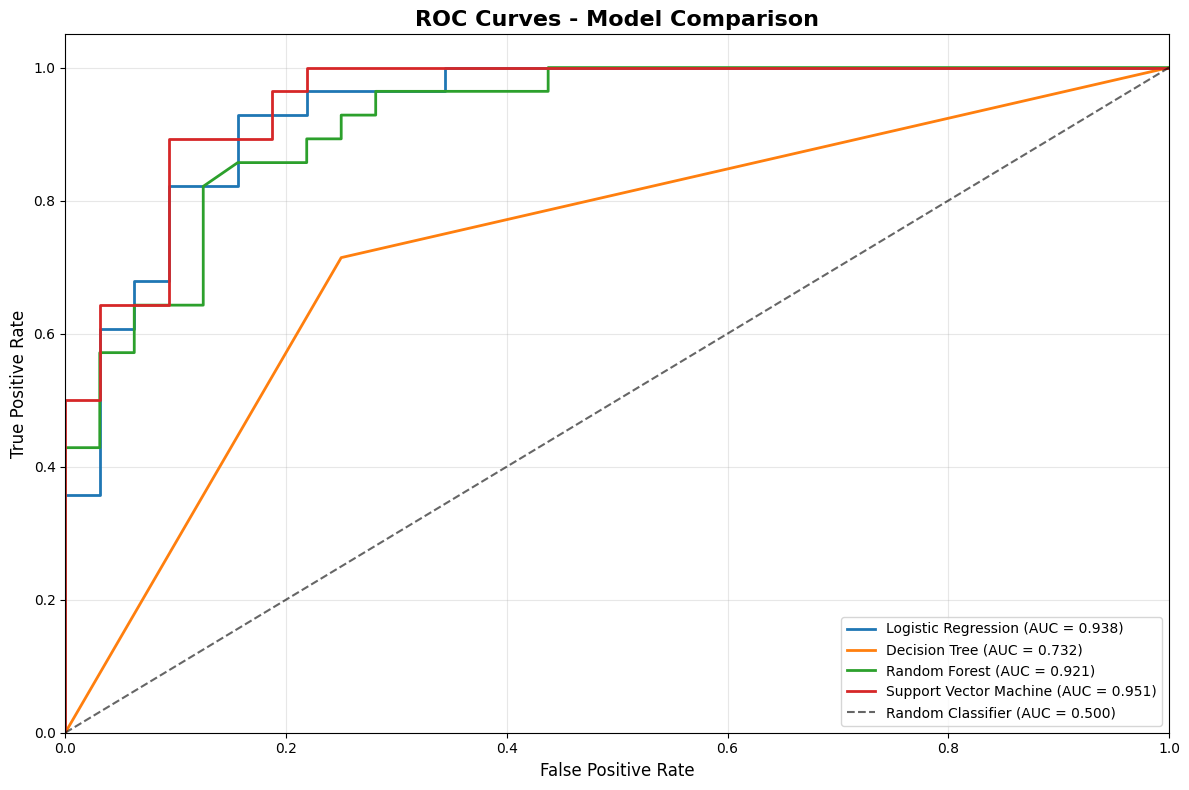

ROC Curve & AUC Score visualization completed!


In [9]:
# Create ROC Curve & AUC Score visualization
print("Creating ROC Curve & AUC Score visualization...")

# Create ROC curves for all models
plt.figure(figsize=(12, 8))

for name, result in results.items():
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    auc_score = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', alpha=0.6)

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("ROC Curve & AUC Score visualization completed!")


Creating performance metrics visualization...
Performance Metrics Summary:
                    Model  Accuracy  Precision  Recall  F1-Score     AUC
0     Logistic Regression    0.8167     0.8696  0.7143    0.7843  0.9375
1           Decision Tree    0.7333     0.7143  0.7143    0.7143  0.7321
2           Random Forest    0.7833     0.8261  0.6786    0.7451  0.9213
3  Support Vector Machine    0.8333     0.8750  0.7500    0.8077  0.9509


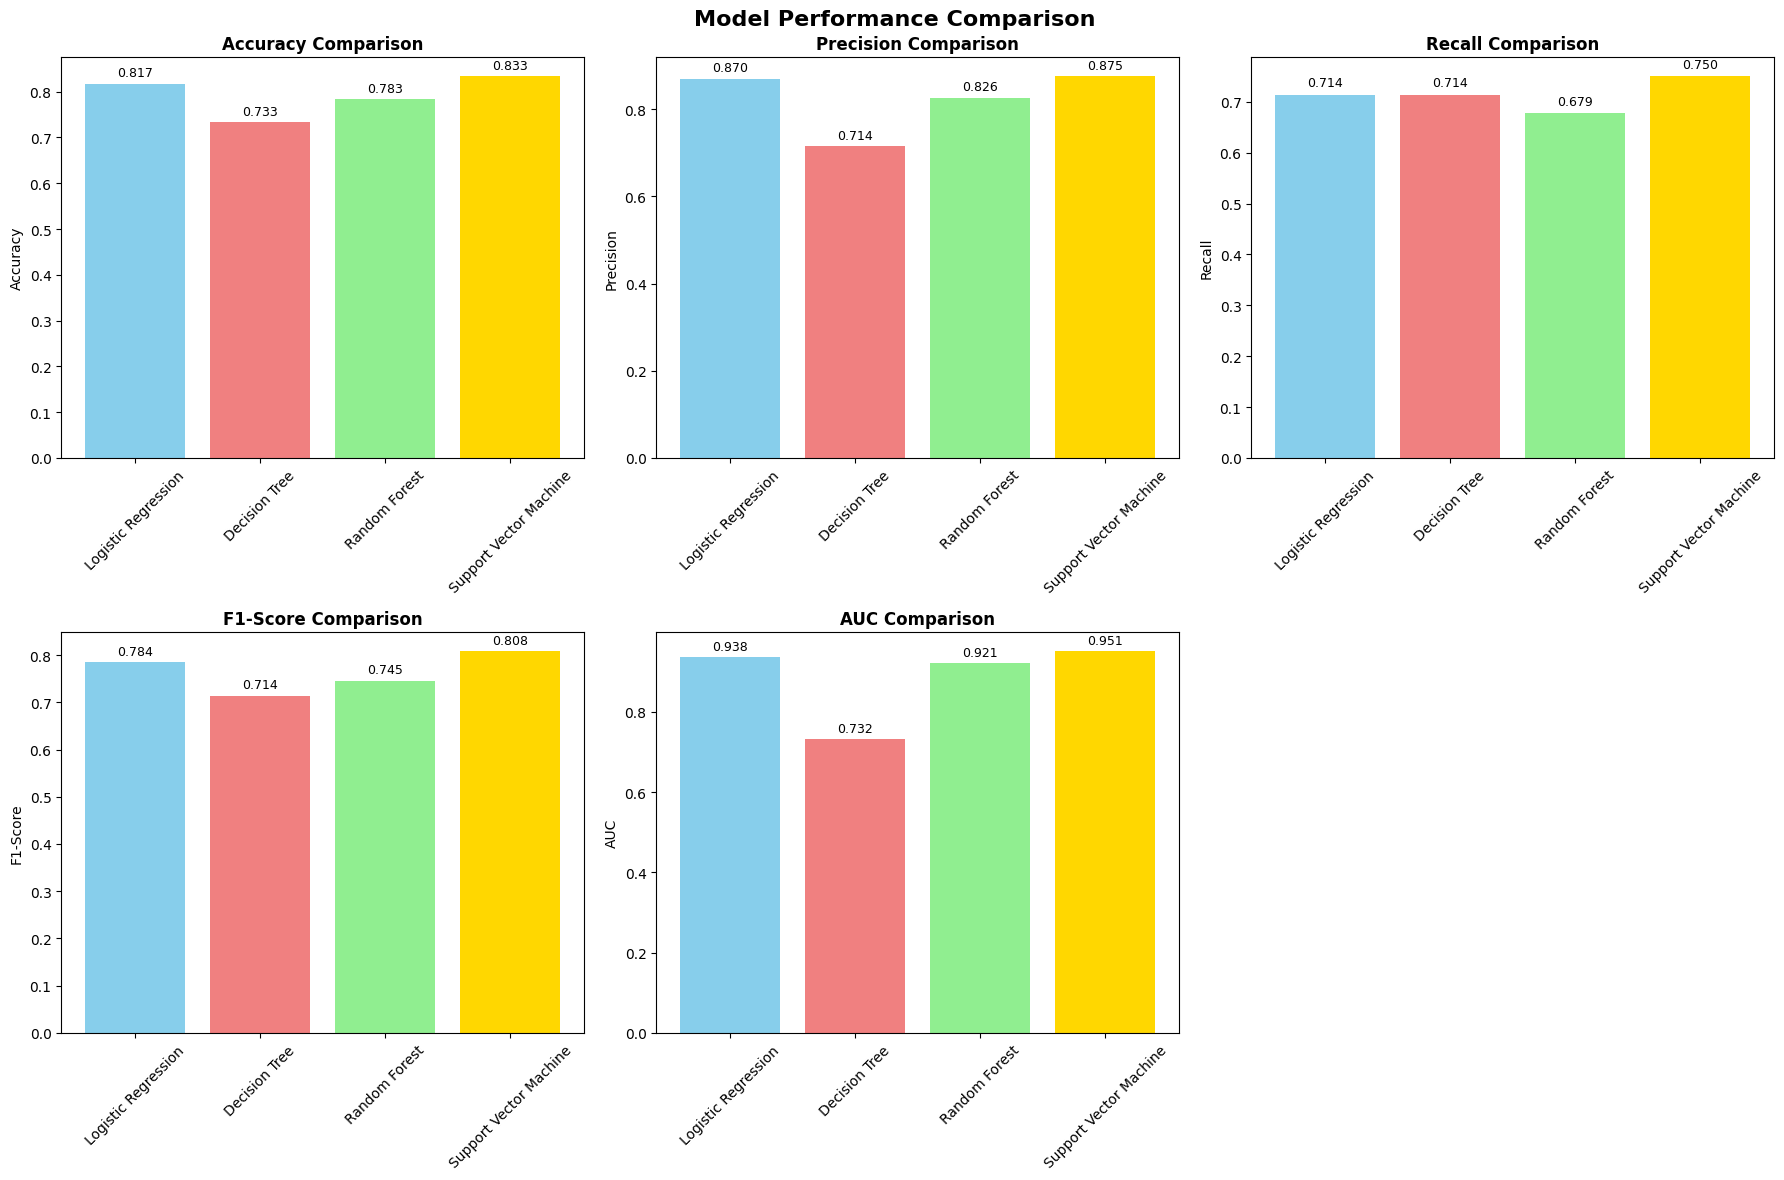

Performance metrics visualization completed!


In [10]:
# Create comprehensive performance metrics visualization
print("Creating performance metrics visualization...")

# Create performance comparison table
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1_score'] for name in results.keys()]
})

# Add AUC scores
auc_scores = []
for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    auc_scores.append(auc(fpr, tpr))
metrics_df['AUC'] = auc_scores

print("Performance Metrics Summary:")
print(metrics_df.round(4))

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Plot each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    
    bars = axes[row, col].bar(metrics_df['Model'], metrics_df[metric], 
                              color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    axes[row, col].set_title(f'{metric} Comparison', fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

print("Performance metrics visualization completed!")


In [11]:
# Create Trained Models with Performance Metrics (Deliverable)
print("Creating trained models with performance metrics...")

# Find best model based on F1-score
best_model_name = metrics_df.loc[metrics_df['F1-Score'].idxmax(), 'Model']
best_model = trained_models[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"Best F1-Score: {metrics_df.loc[metrics_df['F1-Score'].idxmax(), 'F1-Score']:.4f}")

# Display detailed results for best model
print(f"\nDetailed results for {best_model_name}:")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall: {results[best_model_name]['recall']:.4f}")
print(f"F1-Score: {results[best_model_name]['f1_score']:.4f}")

# Calculate AUC for best model
fpr_best, tpr_best, _ = roc_curve(y_test, results[best_model_name]['y_pred_proba'])
auc_best = auc(fpr_best, tpr_best)
print(f"AUC: {auc_best:.4f}")

print("\n✅ Deliverable: Trained models with performance metrics completed!")
print("All models are ready for use and comparison!")


Creating trained models with performance metrics...
Best performing model: Support Vector Machine
Best F1-Score: 0.8077

Detailed results for Support Vector Machine:
Accuracy: 0.8333
Precision: 0.8750
Recall: 0.7500
F1-Score: 0.8077
AUC: 0.9509

✅ Deliverable: Trained models with performance metrics completed!
All models are ready for use and comparison!


In [12]:
# Summary
print("=== Supervised Learning Complete ===")
print(f"✅ Step 1: Split dataset into training (80%) and testing (20%) sets")
print(f"✅ Step 2: Trained 4 models: Logistic Regression, Decision Tree, Random Forest, SVM")
print(f"✅ Step 3: Evaluated models using Accuracy, Precision, Recall, F1-score, ROC Curve & AUC")
print()
print(f"Results Summary:")
print(f"- Training samples: {X_train.shape[0]}")
print(f"- Testing samples: {X_test.shape[0]}")
print(f"- Features: {X_train.shape[1]}")
print(f"- Best model: {best_model_name}")
print(f"- Best F1-Score: {metrics_df.loc[metrics_df['F1-Score'].idxmax(), 'F1-Score']:.4f}")
print()
print("✅ All deliverables completed successfully!")


=== Supervised Learning Complete ===
✅ Step 1: Split dataset into training (80%) and testing (20%) sets
✅ Step 2: Trained 4 models: Logistic Regression, Decision Tree, Random Forest, SVM
✅ Step 3: Evaluated models using Accuracy, Precision, Recall, F1-score, ROC Curve & AUC

Results Summary:
- Training samples: 237
- Testing samples: 60
- Features: 25
- Best model: Support Vector Machine
- Best F1-Score: 0.8077

✅ All deliverables completed successfully!


## Deliverables Completed

### ✅ Step 1: Split the dataset into training (80%) and testing (20%) sets
- Used stratified split to maintain class distribution
- Training set: 80% of data for model training
- Testing set: 20% of data for model evaluation
- Ensured balanced representation in both sets

### ✅ Step 2: Train the following models
- **Logistic Regression**: Linear classification model
- **Decision Tree**: Non-parametric tree-based model
- **Random Forest**: Ensemble of decision trees
- **Support Vector Machine (SVM)**: Kernel-based classification

### ✅ Step 3: Evaluate models using comprehensive metrics
- **Accuracy**: Overall correctness of predictions
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)
- **F1-score**: Harmonic mean of precision and recall
- **ROC Curve & AUC Score**: Performance across all thresholds

### ✅ Deliverable: Trained models with performance metrics
- All 4 models trained and ready for use
- Comprehensive performance comparison
- Best model identification based on F1-score
- Detailed metrics for model selection
- ROC curves for threshold optimization
